In [1]:
# Register the catalyst magic
%load_ext catalyst
%matplotlib inline

Running in backtesting mode.


[2018-03-22 14:12:44.071123] WARNING: run_algo: Catalyst is currently in ALPHA. It is going through rapid development and it is subject to errors. Please use carefully. We encourage you to report any issue on GitHub: https://github.com/enigmampc/catalyst/issues
[2018-03-22 14:12:44.072318] INFO: run_algo: Catalyst version 0.5.5
[2018-03-22 14:12:47.077410] INFO: run_algo: running algo in backtest mode
[2018-03-22 14:12:47.705935] INFO: exchange_algorithm: initialized trading algorithm in backtest mode


buying


[2018-03-22 14:12:59.340032] INFO: Performance: Simulated 976 trading days out of 976.
[2018-03-22 14:12:59.343157] INFO: Performance: first open: 2015-03-01 00:00:00+00:00
[2018-03-22 14:12:59.345243] INFO: Performance: last close: 2017-10-31 23:59:00+00:00


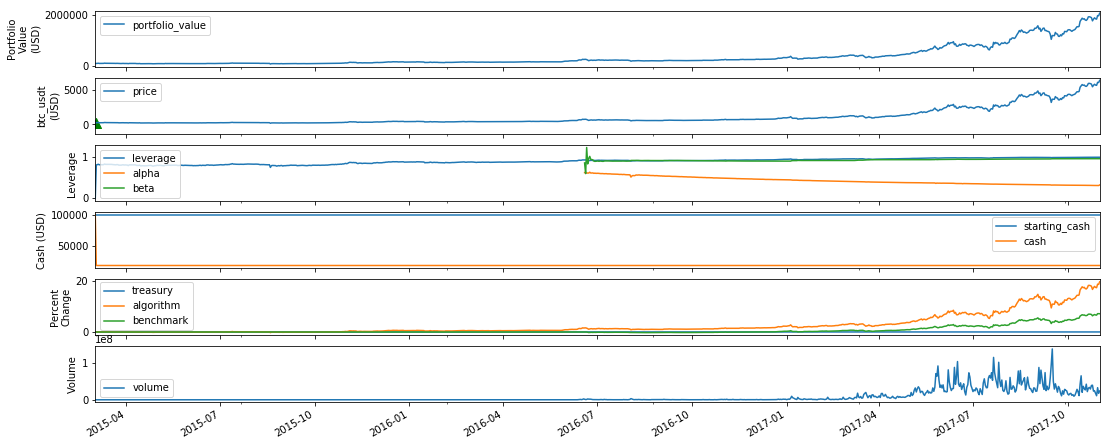

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,cash,ending_cash,ending_exposure,...,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,volume,treasury,algorithm,benchmark
2015-03-01 23:59:00+00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.00000,100000.00000,100000.00000,0.000000e+00,...,100000.0,0.000000e+00,0.000000e+00,1,[],0.0200,3.177152e-01,0.0200,0.000000,0.000000
2015-03-02 23:59:00+00:00,0.023443,-0.002088,NaN,0.000000,0.000000,NaN,-80527.57386,19472.42614,19472.42614,8.031873e+04,...,100000.0,0.000000e+00,0.000000e+00,2,"[{'amount': 318.7250996015936, 'dt': 2015-03-0...",0.0208,9.806380e+01,0.0208,-0.002088,0.000000
2015-03-03 23:59:00+00:00,0.455404,0.046421,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,8.516972e+04,...,100000.0,8.031873e+04,8.031873e+04,3,[],0.0212,4.429831e+02,0.0212,0.046421,0.000000
2015-03-04 23:59:00+00:00,0.415707,0.087155,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,8.924303e+04,...,100000.0,8.516972e+04,8.516972e+04,4,[],0.0212,2.458890e+02,0.0212,0.087155,0.000000
2015-03-05 23:59:00+00:00,0.725920,0.013848,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,8.191242e+04,...,100000.0,8.924303e+04,8.924303e+04,5,[],0.0211,1.174407e+02,0.0211,0.013848,0.000000
2015-03-06 23:59:00+00:00,0.656770,0.032972,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,8.382476e+04,...,100000.0,8.191242e+04,8.191242e+04,6,[],0.0224,8.419795e+01,0.0224,0.032972,0.000000
2015-03-07 23:59:00+00:00,0.606628,0.023410,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,8.286853e+04,...,100000.0,8.382476e+04,8.382476e+04,7,[],0.0224,1.819948e-01,0.0224,0.023410,0.000000
2015-03-08 23:59:00+00:00,0.562065,0.023410,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,8.286854e+04,...,100000.0,8.286853e+04,8.286853e+04,8,[],0.0224,3.090035e+01,0.0224,0.023410,0.000000
2015-03-09 23:59:00+00:00,0.527918,0.036159,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,8.414343e+04,...,100000.0,8.286854e+04,8.286854e+04,9,[],0.0220,1.283670e+02,0.0220,0.036159,0.000000
2015-03-10 23:59:00+00:00,0.635147,0.122214,NaN,0.000000,0.000000,NaN,0.00000,19472.42614,19472.42614,9.274900e+04,...,100000.0,8.414343e+04,8.414343e+04,10,[],0.0214,5.496176e+01,0.0214,0.122214,0.000000


In [11]:
%%catalyst --start 2015-3-1 --end 2017-10-31 --capital-base 100000 -x poloniex -c btc

import pandas as pd
import matplotlib.pyplot as plt

from catalyst import run_algorithm
from catalyst.api import (order_target_value, symbol, record,
                          cancel_order, get_open_orders, )


def initialize(context):
    context.ASSET_NAME = 'btc_usdt'
    context.TARGET_HODL_RATIO = 0.8
    context.RESERVE_RATIO = 1.0 - context.TARGET_HODL_RATIO

    context.is_buying = True
    context.asset = symbol(context.ASSET_NAME)

    context.i = 0


def handle_data(context, data):
    context.i += 1

    starting_cash = context.portfolio.starting_cash
    target_hodl_value = context.TARGET_HODL_RATIO * starting_cash
    reserve_value = context.RESERVE_RATIO * starting_cash

    # Cancel any outstanding orders
    orders = get_open_orders(context.asset) or []
    for order in orders:
        cancel_order(order)

    # Stop buying after passing the reserve threshold
    cash = context.portfolio.cash
    if cash <= reserve_value:
        context.is_buying = False

    # Retrieve current asset price from pricing data
    price = data.current(context.asset, 'price')

    # Check if still buying and could (approximately) afford another purchase
    if context.is_buying and cash > price:
        print('buying')
        # Place order to make position in asset equal to target_hodl_value
        order_target_value(
            context.asset,
            target_hodl_value,
            limit_price=price * 1.1,
        )

    record(
        price=price,
        volume=data.current(context.asset, 'volume'),
        cash=cash,
        starting_cash=context.portfolio.starting_cash,
        leverage=context.account.leverage,
    )


def analyze(context=None, results=None):

    # Plot the portfolio and asset data.
    ax1 = plt.subplot(611)
    results[['portfolio_value']].plot(ax=ax1)
    ax1.set_ylabel('Portfolio\nValue\n(USD)')

    ax2 = plt.subplot(612, sharex=ax1)
    ax2.set_ylabel('{asset}\n(USD)'.format(asset=context.ASSET_NAME))
    results[['price']].plot(ax=ax2)

    trans = results.ix[[t != [] for t in results.transactions]]
    buys = trans.ix[
        [t[0]['amount'] > 0 for t in trans.transactions]
    ]
    ax2.scatter(
        buys.index.to_pydatetime(),
        results.price[buys.index],
        marker='^',
        s=100,
        c='g',
        label=''
    )

    ax3 = plt.subplot(613, sharex=ax1)
    results[['leverage', 'alpha', 'beta']].plot(ax=ax3)
    ax3.set_ylabel('Leverage ')

    ax4 = plt.subplot(614, sharex=ax1)
    results[['starting_cash', 'cash']].plot(ax=ax4)
    ax4.set_ylabel('Cash (USD)')

    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]] = results[[
        'treasury_period_return',
        'algorithm_period_return',
        'benchmark_period_return',
    ]]

    ax5 = plt.subplot(615, sharex=ax1)
    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]].plot(ax=ax5)
    ax5.set_ylabel('Percent\nChange')

    ax6 = plt.subplot(616, sharex=ax1)
    results[['volume']].plot(ax=ax6)
    ax6.set_ylabel('Volume')

    plt.legend(loc=3)

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()